In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
from readcalc import readcalc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Beau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
raw_data = pd.read_excel("long_answer/training_set_rel3.xls")

In [9]:
raw_data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [10]:
raw_data.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1    float64
rater2_domain1    float64
rater3_domain1    float64
domain1_score     float64
rater1_domain2    float64
rater2_domain2    float64
domain2_score     float64
rater1_trait1     float64
rater1_trait2     float64
rater1_trait3     float64
rater1_trait4     float64
rater1_trait5     float64
rater1_trait6     float64
rater2_trait1     float64
rater2_trait2     float64
rater2_trait3     float64
rater2_trait4     float64
rater2_trait5     float64
rater2_trait6     float64
rater3_trait1     float64
rater3_trait2     float64
rater3_trait3     float64
rater3_trait4     float64
rater3_trait5     float64
rater3_trait6     float64
dtype: object

In [11]:
raw_data.shape

(12978, 28)

In [12]:
raw_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
raw_data.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
12977,21633,8,Many people believe that laughter can improve...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
raw_data['word_tokens'] = raw_data.essay.apply(lambda essay: word_tokenize(essay))
raw_data['sentence_tokens'] = raw_data.essay.apply(lambda essay: sent_tokenize(essay))

In [15]:
calc = readcalc.ReadCalc(raw_data.essay[3])

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 3165


In [17]:
calc.get_coleman_liau_index()

11.17417457305503

In [24]:
# Length Features
raw_data['num_words'] = raw_data.word_tokens.apply(lambda tokens: len([token for token in tokens if token.isalpha()]))
raw_data['num_sentences'] = raw_data.sentence_tokens.apply(lambda tokens: len(tokens))
raw_data['avg_sen_length'] = raw_data.num_words/raw_data.num_sentences

# Occurrence Features
raw_data['num_commas'] = raw_data.essay.apply(lambda essay: essay.count(','))
raw_data['num_periods'] = raw_data.essay.apply(lambda essay: essay.count('.'))
raw_data['num_exclaim'] = raw_data.essay.apply(lambda essay: essay.count('!'))
raw_data['num_question'] = raw_data.essay.apply(lambda essay: essay.count('?'))
raw_data['num_semicolon'] = raw_data.essay.apply(lambda essay: essay.count(';'))
raw_data['num_colon'] = raw_data.essay.apply(lambda essay: essay.count(':'))

# Style Features
raw_data['vocabulary'] = raw_data.word_tokens.apply(lambda word_tokens: set(word.lower() for word in word_tokens if word.isalpha()))
raw_data['vocab_size'] = raw_data.essay.apply(lambda vocabulary: len(vocabulary))
raw_data['lexical_diversity'] = raw_data.essay.apply(lambda essay: len(set(essay.split()))/len(essay))
raw_data['long_words'] = raw_data.vocabulary.apply(lambda vocabulary: len([word for word in vocabulary if len(word) > 7]))


# Readability Features
raw_data['coleman_liau_index'] = raw_data.essay.apply(lambda essay: readcalc.ReadCalc(essay).get_coleman_liau_index())


TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1875
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2288
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1541
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 3165
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2569
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1276
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2808
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2724
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2402
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2632
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1963
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 2182
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Si

In [39]:
sent_tok = raw_data.sentence_tokens[2]
print(len(sent_tok))
print(sum([len(word_tokenize(tok)) for tok in sent_tok])/len(sent_tok))

14
22.357142857142858


In [46]:
sent_tok[2][2].isalpha()

True

In [27]:
d = dict()
for i in range(1,9):
    d[i] = raw_data[raw_data.essay_set==i]

In [ ]:
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].essay_length)
#     plt.title("Distribution of Essay Length Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].vocab_size)
#     plt.title("Distribution of Vocab Size Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].lexical_diversity)
#     plt.title("Distribution of Lexical Diversity Set{}".format(i))

for i in range(1,9):
    plt.figure()
    sns.distplot(d[i].long_words)
    plt.title("Distribution of Long Words Set{}".format(i))

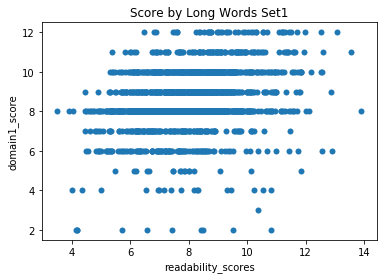

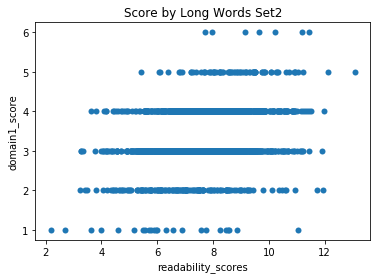

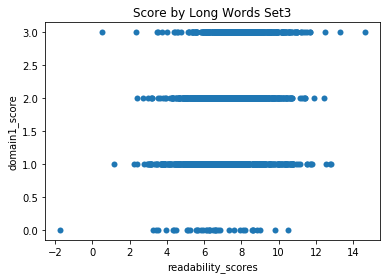

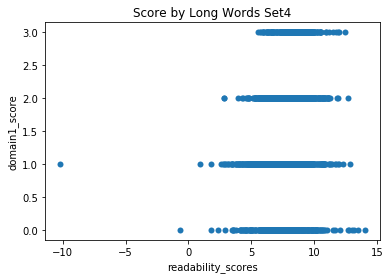

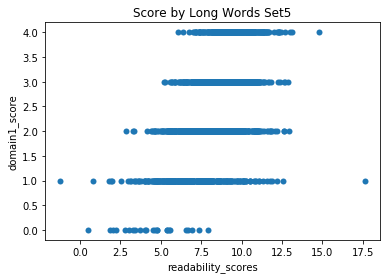

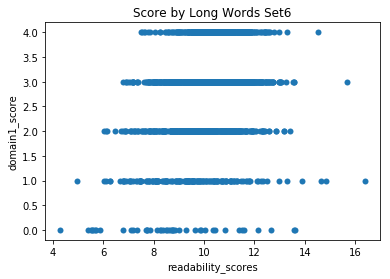

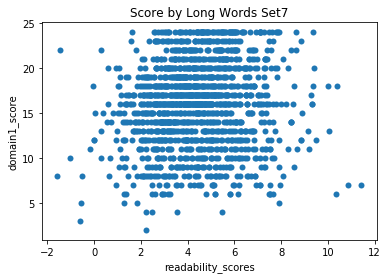

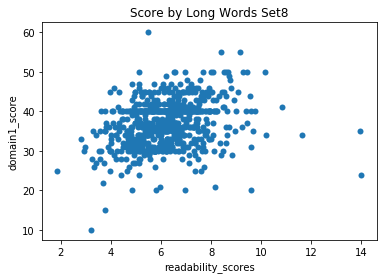

In [28]:
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="essay_length", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Length Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="vocab_size", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Vocab Size Set{}".format(i))

# Lexical diversity could be misleading because longer essays should have lower lexical divserity and those with really high lexical diversity may just be very short.
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="lexical_diversity", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Lexical Diversity Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="essay_length", y="lexical_diversity",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Length by Lexical Diversity Set{}".format(i))

# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="long_words", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Long Words Set{}".format(i))

# for i in range(1,9):
#     plt.figure()
#     sns.stripplot(x="num_sentences", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i], jitter=True)
#     plt.title("Score by Number of Sentences Set{}".format(i))

for i in range(1,9):
    plt.figure()
    sns.scatterplot(x="coleman_liau_index", y="domain1_score",
                sizes=(1, 8), linewidth=0,
                data=d[i])
    plt.title("Score by Long Words Set{}".format(i))